In [18]:
import matplotlib
matplotlib.use('AGG')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib.cm

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

import matplotlib.pyplot as plt
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import warnings

#warnings.filterwarnings('ignore')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/usr/local/lib/python2.7/dist-packages/tor

In [6]:
plot_file = '/mnt/1717A37A1971CE02/WorkSpaces/BDMA/data-mining/bdma-data-mining/db-scan-lab/data/output_denclue.csv'
fig_file = 'plot.png'

In [7]:
df = pd.read_csv(plot_file, header=None, skip_blank_lines=True)

df.head()

,0,1,2
0,-0.808880,52.108123,0
1,-0.896504,52.214656,0
2,-0.728738,51.990075,0
3,-0.657982,52.280428,0
4,-0.696904,52.057163,0


In [8]:
df.shape

(1771, 3)

In [9]:

labels = df[2]
X = df

unique_labels = set(labels)
print "Number of clusters :" + str(len(unique_labels))


Number of clusters :3


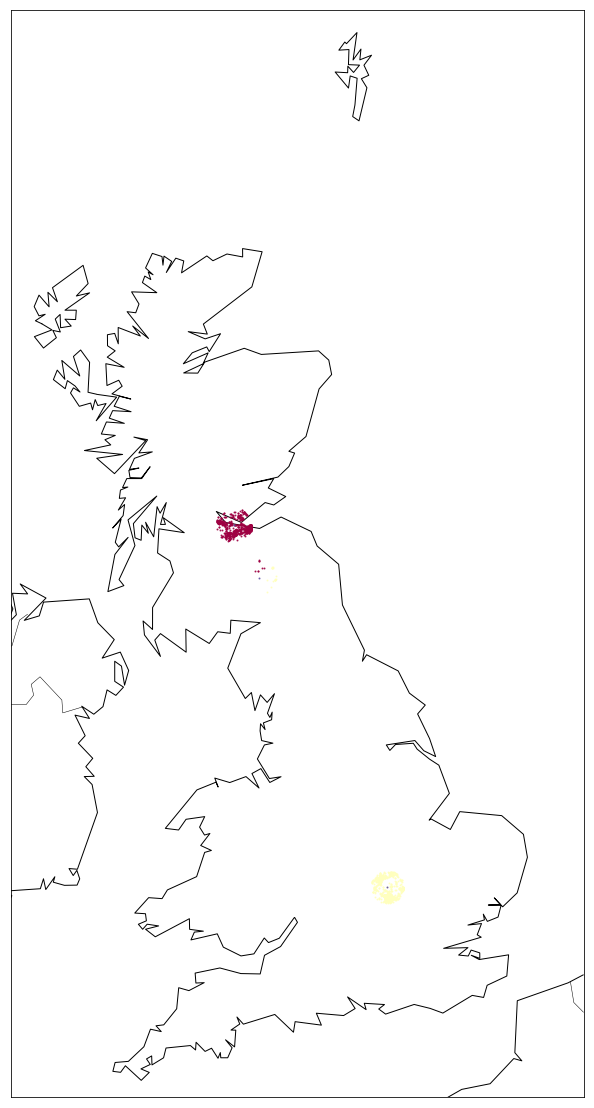

In [17]:
## Initialize the map
fig, ax = plt.subplots(figsize=(20,20))
m = Basemap(llcrnrlon=-7.5600,llcrnrlat=49.7600,
            urcrnrlon=2.7800,urcrnrlat=60.840,
            resolution='l', # Set using letters, e.g. c is a crude drawing, f is a full detailed drawing
            projection='merc', # The projection style is what gives us a 2D view of the world for this
            lon_0=-4.36,lat_0=54.7)#, # Setting the central point of the image
            #epsg=27700) # Setting the coordinate system we're using

#m.drawmapboundary(fill_color='#46bcec') # Make your map into any style you like
#m.fillcontinents(color='#f2f2f2',lake_color='#46bcec') # Make your map into any style you like
m.drawcoastlines()
#m.drawrivers() # Default colour is black but it can be customised
m.drawcountries()
#m.drawstates()

labels = df[2]
X = df

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

colr_map = {}

for l,c in zip(unique_labels, colors):
    colr_map[l]=c

#df['lon_lat'] = list(zip(df[3], df[4])) # Creating tuples


for row in X.itertuples():
        # indexing is +1 
        x, y = m(row[1], row[2])
        m.plot(x, y, marker = 'o', c=colr_map[row[3]], markersize=1, alpha=0.8)

fig.savefig(fig_file, dpi=200)     